# 0:  Loading the MNIST fashion data set

It is already split out into a train and test set,  but the X and y values (label or target) are in single file

In this version, we want to build a multiple category classification system, rather than a binary classifier

The opening section of this notebook is identical to the binary classification assignment

Use the ideas from the in class exercise using the MNIST digits set to build a classifier for the Fashion data with multiple categories

I'm going to get you started here a bit,  but pay attention to how I load the data here and the data formats used.

This data came as two csv files, with the filenames as shown

I got the data files from kaggle.com,  this data set is widely distributed

I loaded this as a pandas data frame,  this is a relatively reliable, easy data frame to use

I think this file has a header

See

https://www.kaggle.com/zalando-research/fashionmnist


# load the pandas and numpy libraries
used for the data frame tools (Pandas) and to define matrices and do linear algebra (Numpy)

In [1]:
import pandas as pd
import numpy as np

The next steps load the test and training data into pandas data frames

Pandas has a dataframe structure much like the R dataframe, or an SQL table

There are many pandas member functions that do useful operations on the data frame,  here the
read_csv() member function is used to load csv files into data frames.

The infile style variables need to have the full path name to the location of the data files in use

If you are working on a local computer, download thes files and then enter their full file address below, using the same format I used.

If you are using google colab to run this,

         -click on the file menu on the left command bar

         -click on the sample data folder (or create it)

         -upload the two files to colab's file storage

                -fashion-mnist_train.csv

                -fashion-mnist_test.csv
          
          -when the files are uploaded, right click on them and
             copy the file addresses down to the infile names below
  

In [4]:
# the first two lines are for an upload of the data file on a local computer

#train_infile="D:\\Example_data\\MNIST\\fashion-mnist_train.csv"

#test_infile="D:\\Example_data\\MNIST\\fashion-mnist_test.csv"


# the next two lines are in infile names when I ran this on Colab

train_infile="/content/fashion-mnist_train.csv"

test_infile="/content/fashion-mnist_test.csv"


train_df=pd.read_csv(train_infile)

test_df=pd.read_csv(test_infile)

Let's look at the available member function for a pandas data frame

In [5]:
dir(test_df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

In [6]:
test_df.columns[0:5]

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4'], dtype='object')

In [7]:
test_df.shape

(10000, 785)

In [8]:
train_df.shape

(60000, 785)

Okay,  I'm expecting 28 x 28 greyscale images again,  we have the first column as the label, the rest of this is the pixels

Most skearn models will accept pandas dataframes as input data,   so I don't think we need to do much here except split out
the first column as y and the rest of the df as X

pandas has a member function called pop that removes a row from the dataframe.  We'll use that to both set y_train equal to the labels, and X_train to the remaining df

In [9]:
y_train=train_df.pop('label')
X_train=train_df

In [10]:
print(y_train.shape)
print(X_train.shape)

(60000,)
(60000, 784)


In [11]:
y_test=test_df.pop('label')
X_test=test_df

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

The % symbol indicates that this is a magic function,  that is to say a function
command for the jupyter notebook server, not to the python kernel

This particular command causes plots created using the matplotlib libary to print in the
notebook not in a new window

In [12]:
%matplotlib inline

## 1: Data plots

Okay here is the visualization of one image, a shirt

Note:   I use a location slice of the X_train dataframe,    X_train.loc[0,:] to get row zero, all entries,  or the first
    image in the array.   I then force that into the np.array form so I can use the reshape() member function to reshape the
    row of data into a 28 x 28 image.
    
    I don't think that pandas easily allows the reshape maneuver, so that's why I converted to an np.array,  the
    reshape operation produces an np matrix that can be plotted with imshow.  There may be a better way to do this.  Hmm.
    
Also I checked, and we can feed X_train into the training input of the classifier as a pd.dataframe, there is no need to change
the format

Most sklearn models will accept either pandas dataframes or np matrices as inputs,  which is a help

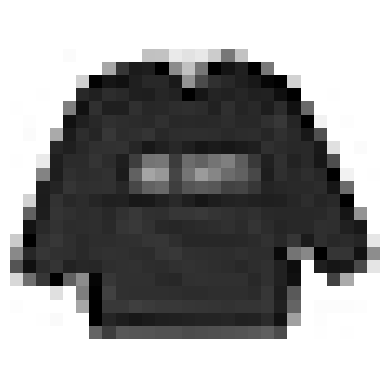

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X_train.loc[0,:])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [14]:
y_train[0]

2

# Question/Action

What type of cloting is this image supposed to be?   Insert a cell with your answer below

#Question/Action

Show images of a sandal and a sneaker from this data set, show them in cells below

Show all your steps

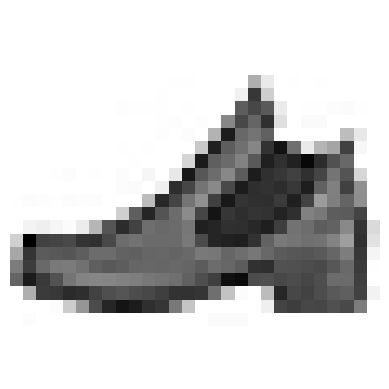

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X_train.loc[1,:])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [16]:
y_train[1]

9

## 2: Time to Build some models

Lets build a multi category classifying neural net model

fclf - this should classify each image to one of the ten label classes (0-9)



## Okay, go build some models-Assignment

1.) For each model find the accuracy, the confusion matrix, the precision and the recall, label these all/
    Look at the confusion matrix,  explain which classes of objects were most likely to be confused with
    each other and which were most distinct.  Explain why you think this happens,  does it make sense?

    I ran these quickly (so I know this works) and got 87.7 % accuracy for the X-train data set using all 10 classes and
    97.7 % accuracy  for the binary classification (ie the pullover detector).  See if you can beat the quick results I got.       Post your results in the discussion section of D2L for this week.  Discuss what you did to beat my score

2.) Also, create the ROC curve for the binary classifier and compute the AUC for the ROC,  for the binary classifier,  but not for the 10 element classifier

3.) When you are done with steps 1 and 2,   use your two classifier models to classify the test data.
    Is there evidence of overfitting?  What tells you this?


Print your completed jupyter notebook to a pdf file,  you can use the browser to print to pdf.  Upload this to dropbox in D2L to submit the homework.

## fclf2-  A binary classifier as either class 2 or not

Since class two is a pullover, this is a "pullover detector"

# Action
Add the confusion matrix and visualize it as a heatmap

# Action

Figure out how to calculate the percentage of correct answers for each category